In [0]:
GLOBALS__={}

#MAIN

In [2]:
# @title Обработка документов { output-height: 800, form-width: "300px", display-mode: "form" }


import os
import sys


def interactive_upload(filetype):
  from google.colab import files
  import docx2txt

  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs = []
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text

    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs


# ====================================
# ====================================
_git_branch = "master"  # @param {type:"string"}
# ====================================
# ====================================


# ''' AZ:-IMPORT CODE GITHUB----------------------------------------------😺------ '''
import sys


def _init_import_code_from_gh():
  if 'GLOBALS__' not in globals():
    print('adding global GLOBALS__')
    global GLOBALS__
    GLOBALS__ = {}

  if '_init_import_code_from_gh' in GLOBALS__:
    print('👌 code already imported from GitHub!')
    return

  import subprocess
  def exec(x):
    r = subprocess.check_output(x, shell=True)
    r = r.decode('unicode-escape').encode('latin1').decode('utf8')
    print(r)

  print(f"fetching code from GitHub.....{_git_branch}")
  try:
    exec('rm -r nlp_tools')
  except:
    pass
  exec(f'git clone --single-branch --branch {_git_branch} https://github.com/compartia/nlp_tools.git nlp_tools')

  print('🦊 GIT revision:')
  exec('cd nlp_tools\ngit rev-list --reverse HEAD | awk "{ print NR }" | tail -n 1\ngit branch\ngit log -3 --pretty=%B')

  sys.path.insert(0, 'nlp_tools')

  # self-test
  from text_tools import untokenize
  print(untokenize(['code', 'imported', 'OK 👍']))

  print('installing antiword...')
  exec('sudo apt-get install antiword')

  print('installing docx2txt...')
  exec("pip install docx2txt")

  GLOBALS__['_init_import_code_from_gh'] = True

  ''' AZ:-------------------------------------------------IMPORT CODE GITHUB-😺---'''
  print('❤️ DONE importing Code fro GitHub')


# AZ:-INIT ELMO-----------------------------------------------------------------------------------

import tensorflow as tf
import tensorflow_hub as hub


def _import_elmo():
  """
  ACHTUNG!! this method is called later by ElmoEmbedder
  """

  elmo = hub.Module('https://storage.googleapis.com/az-nlp/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz',
                    trainable=False)  # news
  #   elmo = hub.Module('https://storage.googleapis.com/az-nlp/elmo_ru-twitter_2013-01_2018-04_600k_steps.tar.gz',
  #                     trainable=False)  # twitter
  print('❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module ')
  print('Tensorflow version is', tf.__version__)

  return elmo


# AZ:-INIT EMBEDDER-----------------------------------------------------------------------------------

def _init_embedder():
  if 'elmo_embedder' in GLOBALS__:
    print('👌 Embedder is already created! ')
    return

  from embedding_tools import ElmoEmbedder
  GLOBALS__['elmo_embedder'] = ElmoEmbedder(_import_elmo(), tf, 'elmo', _import_elmo)

  print('❤️ DONE creating words embedding model')
  return GLOBALS__['elmo_embedder']


# AZ:-Init chartes context-----------------------------------------------------------------------------------
def _init_charters():
  if 'CharterAnlysingContext' in GLOBALS__:
    print('👌 Charters-related tools are already inited ')
    return

  _init_embedder()  # PRECONDITION
  from charter_patterns import CharterPatternFactory
  from charter_parser import CharterDocumentParser
  CPF = CharterPatternFactory(GLOBALS__['elmo_embedder'])
  GLOBALS__['CharterAnlysingContext'] = CharterDocumentParser(CPF)
  print('❤️ DONE initing Charters-related tools and models ')


def _init_contracts():
  if 'ContractAnlysingContext' in GLOBALS__:
    print('👌 Contracts-related tools are already inited ')
    return

  from contract_parser import ContractAnlysingContext
  GLOBALS__['ContractAnlysingContext'] = ContractAnlysingContext(GLOBALS__['elmo_embedder'], GLOBALS__['renderer'])
  print('❤️ DONE initing Contracts-related tools and models ')


# AZ:- THE CODE----------------------------------------------------------------------------------
from typing import List


def _init_the_code(reset=False):
  if '_init_the_code' in GLOBALS__ and not reset:
    print('👌 Code is alredy imported!')
    return

  from transaction_values import ValueConstraint

  import matplotlib as mpl
  from IPython.core.display import display, HTML
  import matplotlib.pyplot as plt
  
  from renderer import AbstractRenderer, HtmlRenderer, head_types_colors
  from renderer import to_multicolor_text, as_headline_3, as_offset
  from renderer import as_msg, as_quote, as_c_quote
  from renderer import as_error_html, known_subjects_dict, v_color_map
  from transaction_values import ValueConstraint
  from parsing import head_types_dict, head_types
  from legal_docs import PatternSearchResults, ConstraintsSearchResult, PatternSearchResult, CharterDocument
  
  import numpy as np
  
  from charter_patterns import known_subjects
  from patterns import AV_SOFT, AV_PREFIX
  from structures import ContractSubject
  from contract_parser import ContractDocument3

  def _as_smaller(txt):
    return f'<div font-size:12px">{txt}</div>'
 
  
  import html as escaper

      
  class DemoRenderer(HtmlRenderer):

    def render_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      html = self.to_color_text( [escaper.escape(t) for t in tokens ] , weights, colormap, print_debug, _range)
      display(HTML(html))
                

    def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      if len(tokens) == 0:
        return " - empty -"
      if len(weights) != len(tokens):
        raise ValueError("number of weights differs weights={} tokens={}".format(len(weights), len(tokens)))

      #   if()
      vmin = weights.min()
      vmax = weights.max()

      if _range is not None:
        vmin = _range[0]
        vmax = _range[1]

      if print_debug:
        print(vmin, vmax)

      norm = mpl.colors.Normalize(vmin=vmin - 0.5, vmax=vmax)
      html = ""
      cmap = mpl.cm.get_cmap(colormap)

      for d in range(0, len(weights)):
        word = tokens[d]
        if word == ' ':
          word = '&nbsp;_ '

        html += '<span title="{} {:.4f}" style="background-color:{}">{} </span>'.format(
          d,
          weights[d],
          mpl.colors.to_hex(cmap(norm(weights[d]))),
          word)

        #     html+='<span style="background-color:' +mpl.colors.to_hex(cmap(norm(weights[d]) ))+ '">' + str(tokens[d]) + " </span>"
        if tokens[d] == '\n':
          html += "<br>"

      return html

    ''' AZ:-Rendering CHARITY🔥-----💸------💸-------💸------------------------------'''
    def render_multicolor_text(self, tokens, vectors, colormap, min_color=None, _slice=None):
      display(HTML(to_multicolor_text(tokens, vectors, colormap, min_color=min_color, _slice=_slice)))

    

    ''' AZ:------💸------💸-------💸----------------------END--Rendering CHARITY🔥------'''

    



    def render_subj(self, contract: ContractDocument3):
      subjects: List[ProbableValue] = contract.subjects

      if len(subjects) > 0:
        sorted_ = [y for y in sorted(subjects, key=lambda x: -x.confidence)]
        subject_kind = sorted_[0].value
        confidence = sorted_[0].confidence
      else:
        subject_kind = ContractSubject.Other

      if subject_kind in known_subjects_dict:
        rendering_name = known_subjects_dict[subject_kind]
      else:
        rendering_name = 'прочее'

      display(
        HTML(f'Предмет договора:'
             f'<h3 style="margin:0">{rendering_name}<sup> {subject_kind}</sup> </h3> '
             f'confidence:{confidence:20,.2f}'))



    def sign_to_text(self, sign: int):
      if sign < 0: return " &lt; "
      if sign > 0: return " &gt; "
      return ' = '

    def probable_value_to_html(self, pv):
      vc = pv.value
      color = '#333333'
      if vc.sign > 0:
        color = '#993300'
      elif vc.sign < 0:
        color = '#009933'

      return f'<b style="color:{color}">{self.sign_to_text(vc.sign)} {vc.currency} {vc.value:20,.2f}' \
             f'<sup>confidence={pv.confidence:20,.2f}</sup></b> '

    def render_contents(self, doc):
      html = as_headline_3('Выявленное Содержание документа')
      html += "<ul>"
      for i in doc.structure.headline_indexes:
        line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li> {line} <sup>line {i}</sup></li>'
      html += "</ul>"

      display(HTML(html))

    def render_sections(self, sections):
      from legal_docs import HeadlineMeta
      html = as_headline_3('Выявленное секции документа')
      html += "<ul>"
      for section_type in sections:
        section: HeadlineMeta = sections[section_type]
        body = section.body.untokenize_cc()[:1000]
        headline = section.subdoc.untokenize_cc()[:500]
        #     line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li><h3> {headline} <sup>type: {section_type}</sup> </h3> <p>{body}</p> </li>'
      html += "</ul>"

      display(HTML(html))

    def render_values(self, values):
      if len(values) > 0:
        for pv in values:
          h = self.probable_value_to_html(pv)
          display(HTML(h))
      else:
        display(HTML('сумма не найдена'))

    def render_value_section_details(self, value_section_info):
      value_section = value_section_info.body
      headline_doc = value_section_info.subdoc

      headline = headline_doc.untokenize_cc()

      v_names = {
        'value_attention_vector',
        'novalue_attention_vector',

        'novalue_attention_vector_local_contrast',
        'value_attention_vector_tuned'}

      fig = plt.figure(figsize=(20, 6))
      ax = plt.axes()
      for vector_name in v_names:
        ax.plot(value_section.distances_per_pattern_dict[vector_name], label=vector_name, alpha=0.4)

      ax.plot(value_section.distances_per_pattern_dict['value_attention_vector_tuned'], label='value_attention result',
              alpha=0.9, color='black')
      plt.legend(loc='upper right')

      text = self.to_color_text(value_section.tokens_cc,
                                value_section.distances_per_pattern_dict['value_attention_vector_tuned'], _range=(0, 1))
      html = f'{ as_headline_3(headline)} <div style="margin-left:4em; font-size=90%">{text}</div>'
      display(HTML(html))

     
    def render_charter_parsing_results_2(self, charter):
      display(HTML(self.charter_parsing_results_to_html(charter)))
      
    def render_charter_parsing_results(self, doc, org, rz, charity_constraints):
      WARN = '\033[1;31m======== Dear Artem, ACHTUNG! 🔞 '
      print (WARN+f"use {self.render_charter_parsing_results} is deprecated")
      txt_html = self.to_color_text(org['tokens'], org['attention_vector'], _range=[0, 1])

      html = '<div style="background:#eeeeff; padding:0.5em"> recognized NE(s): <br><br> org type:<h3 style="margin:0">  {} </h3>org full name:<h2 style="margin:0">  {} </h2> <br>quote: <div style="font-size:90%; background:white">{}</div> </div>'.format(
        org['type_name'], org['name'], txt_html)
      # html+=txt_html
      html += self.render_constraint_values(doc, rz, charity_constraints)

      display(HTML(html))

 

     

    
 

  GLOBALS__['renderer'] = DemoRenderer()

  # AZ:----------PROTOCOLS RENDERER-------------------------

  from legal_docs import LegalDocument

  import matplotlib as mpl
  from IPython.core.display import display, HTML
  from renderer import as_headline_3, as_headline_4
  from legal_docs import LegalDocument
  from renderer import as_warning, as_headline_3, as_offset, as_smaller


  class ProtocolRenderer(DemoRenderer):

    def winning_patterns_to_html(self, _tokens, ranges, winning_patterns, _range,
                                 colormaps=['Reds', 'Purples', 'Blues', 'Greens', 'Greys']):
      vmin = -ranges[1]
      vmax = -ranges[0]

      #     print("winning_patterns_to_html _range", _range, "min max=", ranges)

      norm = mpl.colors.Normalize(vmax=vmax, vmin=vmin)

      cmaps = []

      #     print (colormaps)
      for n in colormaps:
        cmap = mpl.cm.get_cmap(n)
        cmaps.append(cmap)

      html = ""

      for d in _range:
        winning_pattern_i = winning_patterns[d][0]
        colormap = cmaps[winning_pattern_i % len(colormaps)]
        normed = norm(-winning_patterns[d][1])
        color = mpl.colors.to_hex(colormap(normed))
        html += '<span title="' + '{} {:.2f}'.format(d, winning_patterns[d][
          1]) + '" style="background-color:' + color + '">' + str(
          _tokens[d]) + " </span>"
        if _tokens[d] == '\n':
          html += "<br>"

      return html

    def _render_doc_subject_fragments(self, doc):
      #     print(doc.per_subject_distances)

      _html = ""
      if doc.per_subject_distances is not None:

        type = "Договор  благотворительного пожертвования"
        if doc.per_subject_distances[0] > doc.per_subject_distances[1]:
          type = "Договор возмездного оказания услуг"

        _html += "<h3>" + type + "</h3>"

        colormaps = ['PuRd'] * 5 + ['Blues'] * 7 + ['Greys']

        _html += as_headline_4('Предмет договора')

        for region in [doc.subj_range]:
          _html += self.winning_patterns_to_html(_tokens=doc.tokens, ranges=doc.subj_ranges,
                                                 winning_patterns=doc.winning_subj_patterns, _range=region,
                                                 colormaps=colormaps)

      return _html

    def render_subject(self, counter):
      html = as_headline_3('Предмет документа (X):') + self.subject_type_weights_to_html(counter)
      display(HTML(html))

    def print_results(self, _doc: LegalDocument, results=None):
      values = sorted(_doc.values, key=lambda item: -item.confidence)

      if values is None or len(values)==0:
        display(HTML(as_warning('сумма не найдена')))
        return 


      cc = 0  
      for vl in values:

        h = as_headline_3(self.probable_value_to_html(vl))
        h += as_offset(self.to_color_text(vl.value.context.tokens, vl.value.context.attention, colormap='jet'))
        if cc > 0:
          h = as_offset(as_smaller(h))

        display(HTML(h))

        cc += 1
    
    def subject_type_weights_to_html(self, counter):
      dict = {
        't_dea': 'Сделка',
        't_cha': 'Благотворительность',
        't_org': 'Организационные решения'
      }

      maxkey = "None"
      for key in dict:
        if counter[key] > counter[maxkey]:
          maxkey = key

      html = ""
      for key in dict:
        templ = "<div>{}: {}</div>"
        if key == maxkey:
          templ = '<b style="font-size:135%; color:maroon">{}: {}</b>'
        html += templ.format(counter[key], dict[key])

      return html

  GLOBALS__['ProtocolRenderer'] = ProtocolRenderer()

  from demo_protocols import ProtocolAnlysingContext
  GLOBALS__['ProtocolAnlysingContext'] = ProtocolAnlysingContext(GLOBALS__['elmo_embedder'], GLOBALS__['ProtocolRenderer'])
  GLOBALS__['_init_the_code'] = True

  # AZ:-------------------------------------------------Init Protocols context===

  # AZ:-------------------------------------------------Init Charters context====

  def read_doc(fn):
    import docx2txt, sys, os
    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()

    return text

  GLOBALS__['read_doc'] = read_doc

  print("❤️ DONE initializing the code")


# AZ:-FINDING_VIOLATIONS--------------------------------------------------------
def find_and_show_violations():
  from IPython.core.display import display, HTML

  from contract_parser import ContractAnlysingContext
  from renderer import as_headline_2, as_error_html

  print('Поиск нарушений')

  charterAnlysingContext: CharterAnlysingContext = GLOBALS__['CharterAnlysingContext']
  contractAnlysingContext: ContractAnlysingContext = GLOBALS__['ContractAnlysingContext']

  contract = contractAnlysingContext.contract
  charter = charterAnlysingContext.doc
  charter_constraints = charterAnlysingContext.constraints  # XXX: move to doc

  renderer = GLOBALS__['renderer']
  renderer.render_subj(contract)

  import copy

  def convert(v):
    v_converted = copy.copy(v)
    if v.currency in currency_converter:
      v_converted.value = currency_converter[v.currency] * v.value
      v_converted.currency = 'RUB'
      return v_converted
    else:
      display(HTML(as_error_html(
        f"мы не в настроении (пока) конвертировать {v.currency} --> RUB. Это вообще валюта какой страны? Румынии?")))
      return v

  best_value = contractAnlysingContext.find_contract_best_value(convert)

  # rendering:----------------------------

  def _render_violations(ranges_by_group, best_value):
    for group_key in ranges_by_group:
      group = ranges_by_group[group_key]
      display(HTML(as_headline_2(group['name'])))

      for rk in group['ranges']:
        r = group['ranges'][rk]
        display(HTML(r.check_contract_value(best_value, convert, renderer)))

  print("Сумма Договора:")
  renderer.render_values([best_value])
  renderer.render_color_text(best_value.value.context.tokens, best_value.value.context.attention, _range=[0, 1])

  _render_violations(
    charterAnlysingContext.find_ranges_by_group(charter_constraints, convert, verbose=False),
    best_value)

#   display(HTML(renderer.render_constraint_values(charter_constraints)))


# AZ:--------------------------------------------------------FINDING_VIOLATIONS-

# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXX

W0427 04:08:36.441368 140415514740608 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


# step 0. Инит 

In [3]:
## do preparation here

# 1.
_init_import_code_from_gh()
# 2.
_init_embedder()
# 3.
_init_the_code(True)

elmo=_import_elmo()


fetching code from GitHub.....master


🦊 GIT revision:
387
* master
Created using Colaboratory
Created using Colaboratory
Delete Search patterns in TF.ipynb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
code imported OK 👍
installing antiword...
Reading package lists...
Building dependency tree...
Reading state information...
antiword is already the newest version (0.37-11build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.

installing docx2txt...

❤️ DONE importing Code fro GitHub
Instructions for updating:
Colocations handled automatically by placer.


W0427 04:08:47.243899 140415514740608 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module 
Tensorflow version is 1.13.1
❤️ DONE creating words embedding model
❤️ DONE initializing the code
❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module 
Tensorflow version is 1.13.1


## TF


#### Prepare patterns (test 1)

In [4]:


patterns_tokens = [
    "мыл Кришну".split(' '), 
    "мыл".split(' '), 
    'в Едином государственном реестре'.split(' ')]

patterns_tokens_lens=[len(x) for x in patterns_tokens]
maxlen =  max( patterns_tokens_lens)

#padding:
patterns_tokens_ext=[ x+[' ']*(maxlen-len(x)) for x in patterns_tokens ]
print(patterns_tokens_ext)

[['мыл', 'Кришну', ' ', ' '], ['мыл', ' ', ' ', ' '], ['в', 'Едином', 'государственном', 'реестре']]


#### Prepare model

1. populate array of indexes: token index X pattern index, pattern length 
2. embedd text
3. embedd patterns

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

from typing import List

import numpy as np
import tensorflow as tf


# returs
from text_tools import Tokens


def build_everything(words, patterns_tokens:List[Tokens], patterns_tokens_lens_:List[int]):
  """
  
  :param words: tokenized text
  :param patterns_tokens: list of list
  :param patterns_tokens_lens_: 
  :return: matrix of shape [M , N] where M is the number of patterns, and N is the number of words  
  """
  TOKENS_N = len(words[0])
  PATTERN_N = len(patterns_tokens)

  padding = max(patterns_tokens_lens_) - 1
  words_with_padding = words[0] + ['\n'] * padding

  indexes = []
  # Populate array of indexes: token index X pattern index, pattern length 
  for pi in range(PATTERN_N):
    for ti in range(TOKENS_N):
      indexes.append(np.array([ti, pi, patterns_tokens_lens_[pi]]))

  indexes = np.array(indexes, dtype=np.int32)

  config = tf.ConfigProto()
  config.gpu_options.allow_growth = True
  with tf.Session(config=config) as sess:

    IDX = tf.constant(indexes)

    # 1. text embedding
    text_embeddings = elmo(
      inputs={
        "tokens": [words_with_padding],
        "sequence_len": [len(words_with_padding)]
      },
      signature="tokens",
      as_dict=True)["elmo"][0]

    # 2. patterns embedding
    patterns_embeddings = elmo(
      inputs={
        "tokens": patterns_tokens,
        "sequence_len": patterns_tokens_lens_
      },
      signature="tokens",
      as_dict=True)["elmo"]

    # 3. calc distances per pattern    
    def do_at_index(emb_pat_len):
      # emb_pat_len = [ token index, pattern index, pattern length ]

      token_index = emb_pat_len[0]  # for each token
      pattern_indx = emb_pat_len[1]  # for each pattern
      pattern_len = emb_pat_len[2]

      pattern_at_index = patterns_embeddings[pattern_indx]  # getting pattern embeddings at index
      pattern_at_index = pattern_at_index[0:pattern_len]  # trimming its embedding to the original length of the pattern
      # TODO: for better ELMO embedding pattern may have prefix and postfix, remove prefix and postfix

      p_center = tf.reduce_mean(pattern_at_index, axis=0)  # calc mean embedding vector for the pattern
      #todo reduce sum or reduce mean

      slice_end = token_index + pattern_len

      e_center = tf.reduce_mean(text_embeddings[token_index:slice_end],
                                axis=0)  # calc mean embedding vector for the window in the words embeddings    

      p_center = tf.nn.l2_normalize(p_center, 0)  # normalizing is kinda required if we want cosine return [0..1] range 
      e_center = tf.nn.l2_normalize(e_center, 0)  # DO WE?
      
      #todo scroll left by Len of pattern/2
      #Because pattern 

      return tf.losses.cosine_distance(e_center, p_center, axis=0)  ##TODO: how on Earth Cosine could be > 1????

    cosine_distances = tf.map_fn(lambda i: do_at_index(i), IDX, dtype=tf.float32)
    cosine_similarities = 1.0 - cosine_distances
    # --------------------------------------------
    sess.run(tf.global_variables_initializer())

    cosine_similarities_by_pattern = tf.reshape(cosine_similarities, [PATTERN_N, -1])
    out = sess.run(cosine_similarities_by_pattern)
  #   del elmo
  return out

##test
# test_tokens = ["Мама мыла Раму, Рама мыл Кришну, Кришна мыл Брахму. Брахма чист. В окне закрытом нет тебя".split(' ')]
# out = build_everything(test_tokens, patterns_tokens_ext, patterns_tokens_lens)
# tf.reset_default_graph()


#### Test

In [6]:
#uploaded = interactive_upload('Protocol')[0]
uploaded = """
Берлинская дада-ярмарка и Международная выставка сюрреализма в париж­ской галерее «Изящные искусства» в 1938 году стали высшими точками развития двух движений и подвели им итог. На «Сюрреалис­тической улице», за манекенами, выстроившимися в проходе в главный зал, располагались плакаты, приглашения, объявления и фотографии, отсылающие к ранним этапам сюрреализма. В главном зале, за оформление которого отвечал Марсель Дюшан 
 
, а за освеще­ние — Ман Рэй 
 
, картины 1920-х годов висели рядом с более ранними работами, что подчеркивало развити
е сюрреалистического «интернаци­она­ла». Зародившись как литературное течение, к концу 1930-х годов сюрреализм уже около 15 лет господствовал в художественном авангарде Парижа. Прежде чем пойти на спад с началом
Второй мировой войны, он стал частью светской культуры Парижа и даже до некотоРой
степени присягнул высокой моде, подобно тому как русский авангард — пусть совсем иначе — присягну 
в свое время революции. Изящество стиля, свойственное сюррелизму, способствоало этому 
сближению, которое, в свою очередь, упрочило положение многих представителей направления в обществе. 
Однако поначалу для литераторов и художников-бунтарей, ничуть не стремившихся к социаль­ному успеху, 
была куда более естественной связь с дадаизмом"""


from text_tools import tokenize_text

patterns_tokens = [
    tokenize_text("кто-то именуемый в дальнейшем исполнитель"), 
    tokenize_text("заключил ' ' договр"), 
    tokenize_text('литературное течение')]

patterns_tokens_lens=[len(x) for x in patterns_tokens]
maxlen =  max( patterns_tokens_lens)

#padding:
patterns_tokens_ext=[ x+[' ']*(maxlen-len(x)) for x in patterns_tokens ]
#print(patterns_tokens_ext)




TOKENS=tokenize_text(uploaded)
out = build_everything([TOKENS], patterns_tokens_ext, patterns_tokens_lens)

#---------
print("="*80)
print('similarity to', ' '.join(  patterns_tokens_ext[0]) )
print("="*80)
GLOBALS__['renderer'].render_color_text( TOKENS, out[0], _range=[0,1])


print()
print("="*80)
print('similarity to', ' '.join(  patterns_tokens_ext[2]) )
print("="*80)
GLOBALS__['renderer'].render_color_text( TOKENS, out[2], _range=[0,1])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0427 04:08:53.519301 140415514740608 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0427 04:08:54.676192 140415514740608 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Use tf.cast instead.


W0427 04:08:54.810314 140415514740608 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/losses/losses_impl.py:331: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


similarity to кто-то именуемый в дальнейшем исполнитель



similarity to литературное течение      


# A model for finding closest embedding to a pattern
1. At first stage, we calculate attention vectors (AV) for every pattern
2. Then, by each AV we're finding the closest point (best point) in text embedding space, then we're calculating "improved" vectors -- we calculate distance from the "best point"  to each point in text embedding space.  

In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals

from typing import List

import numpy as np
import tensorflow as tf

# returs
from text_tools import Tokens


def build_everything(words, patterns_tokens: List[Tokens], patterns_tokens_lens_: List[int]):
  """

  :param words: tokenized text
  :param patterns_tokens: list of list
  :param patterns_tokens_lens_: 
  :return: matrix of shape [M , N] where M is the number of patterns, and N is the number of words  
  """
  TOKENS_N = len(words[0])
  PATTERN_N = len(patterns_tokens)

  padding = max(patterns_tokens_lens_) - 1
  words_with_padding = words[0] + ['\n'] * padding

  indexes = []
  # Populate array of indexes: token index X pattern index, pattern length 
  for pi in range(PATTERN_N):
    for ti in range(TOKENS_N):
      indexes.append(np.array([ti, pi, patterns_tokens_lens_[pi]]))

  indexes = np.array(indexes, dtype=np.int32)

  config = tf.ConfigProto()
  config.gpu_options.allow_growth = True
  with tf.Session(config=config) as sess:

    # BUILD IT --------------------------------------------
    IDX = tf.constant(indexes)

    def get_dist(a, b):
      a_norm = tf.nn.l2_normalize(a, 0)  # normalizing is kinda required if we want cosine return [0..1] range 
      b_norm = tf.nn.l2_normalize(b, 0)  # DO WE? TODO: try different norm
      return tf.losses.cosine_distance(a_norm, b_norm, axis=0)  ##TODO: how on Earth Cosine could be > 1????

    # 1. text embedding
    text_embeddings = elmo(
      inputs={
        "tokens": [words_with_padding],
        "sequence_len": [len(words_with_padding)]
      },
      signature="tokens",
      as_dict=True)["elmo"][0]

    # 2. patterns embedding
    patterns_embeddings = elmo(
      inputs={
        "tokens": patterns_tokens,
        "sequence_len": patterns_tokens_lens_
      },
      signature="tokens",
      as_dict=True)["elmo"]

    # 3. calc distances per pattern    
    def do_at_index(emb_pat_len):
      # emb_pat_len = [ token index, pattern index, pattern length ]

      token_index = emb_pat_len[0]  # for each token
      pattern_indx = emb_pat_len[1]  # for each pattern
      pattern_len = emb_pat_len[2]

      pattern_at_index = patterns_embeddings[pattern_indx]  # getting pattern embeddings at index
      pattern_at_index = pattern_at_index[0:pattern_len]  # trimming its embedding to the original length of the pattern
      # TODO: for better ELMO embedding pattern may have prefix and postfix, remove prefix and postfix

      p_center = tf.reduce_sum(pattern_at_index, axis=0)  # calc mean embedding vector for the pattern
      # todo reduce sum or reduce mean

      slice_end = token_index + pattern_len

      e_center = tf.reduce_sum(text_embeddings[token_index:slice_end],
                               axis=0)  # calc mean embedding vector for the window in the words embeddings    

      # todo: try to scroll left by Len of pattern/2

      return get_dist(p_center, e_center)

    cosine_distances = tf.map_fn(lambda i: do_at_index(i), IDX, dtype=tf.float32)
    cosine_similarities = 1.0 - cosine_distances

    def improve_dist(attention_vector):
      max_i = tf.math.argmax(attention_vector)
      best_embedding = text_embeddings[max_i]

      token_indices = tf.range(TOKENS_N)
      return tf.map_fn(lambda token_index: get_dist(best_embedding, text_embeddings[token_index]), token_indices,
                       dtype=tf.float32)

    def find_best_embeddings():
      pattern_indexes = tf.range(PATTERN_N)
      return tf.map_fn(lambda pattern_index: improve_dist(cosine_similarities_by_pattern[pattern_index]),
                       pattern_indexes, dtype=tf.float32)

    #       return tf.map_fn(lambda pattern_index: 

    # RUN IT --------------------------------------------
    sess.run(tf.global_variables_initializer())

    cosine_similarities_by_pattern = tf.reshape(cosine_similarities, [PATTERN_N, -1])
    out, improved_attentions = sess.run([cosine_similarities_by_pattern, find_best_embeddings()])
  #   del elmo
  return out, improved_attentions


##test


out, improved_attentions = build_everything([TOKENS], patterns_tokens_ext, patterns_tokens_lens)

# ---------


print()
print("=" * 80)
print('similarity to', ' '.join(patterns_tokens_ext[2]))
print("=" * 80)
GLOBALS__['renderer'].render_color_text(TOKENS, out[2], _range=[0, 1])


print()
print("=" * 80)
print('IMPROVED similarity to', ' '.join(patterns_tokens_ext[2]))
print("=" * 80)
GLOBALS__['renderer'].render_color_text(TOKENS, out[2], _range=[0, 1])


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0427 04:33:09.399312 140415514740608 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0427 04:33:11.422544 140415514740608 saver.py:1483] Saver not created because there are no variables in the graph to restore



similarity to литературное течение      


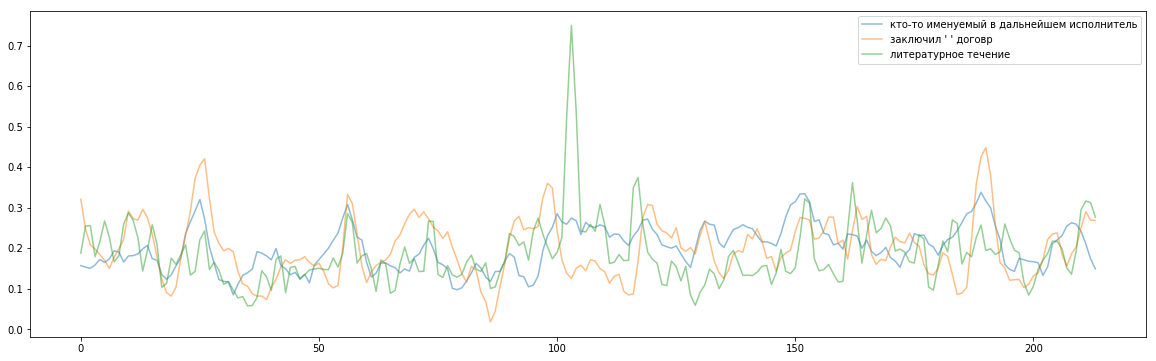

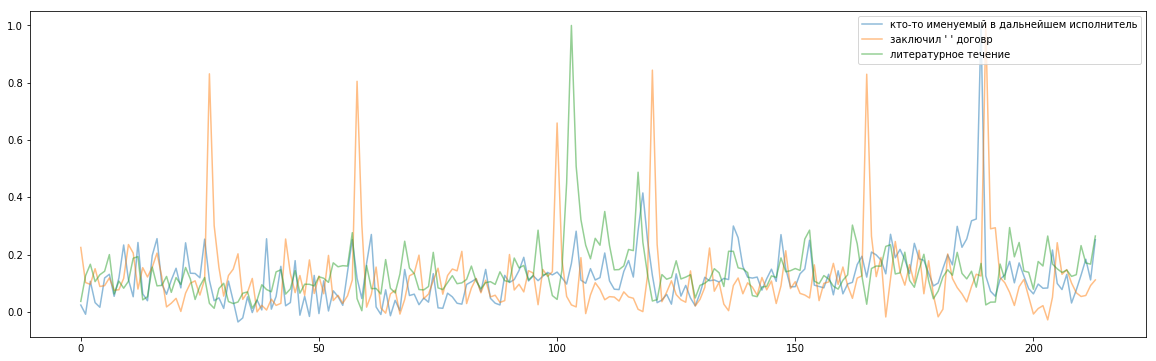

In [16]:
import matplotlib as mpl
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(20, 6))
ax = plt.axes()
for i in range(len(out)):
  ax.plot(out[i], label=' '.join(patterns_tokens_ext[i]) , alpha=0.5)

plt.legend(loc='upper right')


fig = plt.figure(figsize=(20, 6))
ax = plt.axes()
for i in range(len(out)):
  ax.plot(improved_attentions[i], label=' '.join(patterns_tokens_ext[i]) , alpha=0.5)

plt.legend(loc='upper right')